In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

def make_data(N=100, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

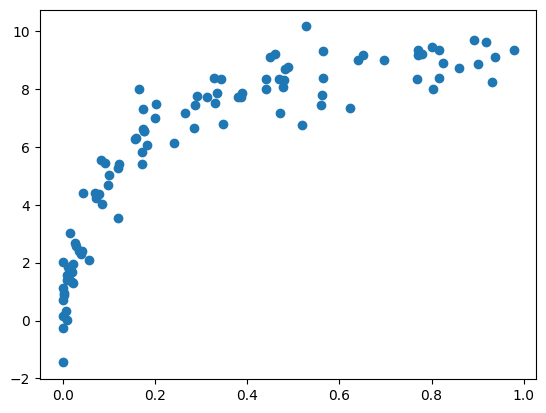

In [9]:
X, y = make_data()
plt.scatter(X.ravel(), y);

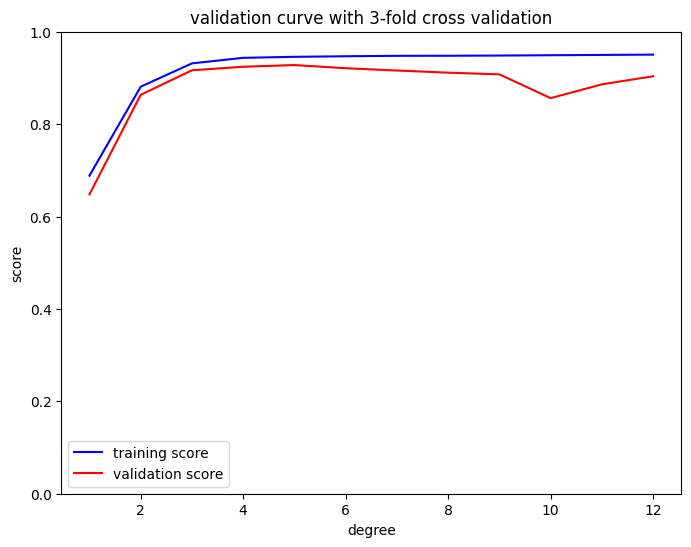

In [28]:
## TODO 
## plot the mean score of training and validation curves using a polynomial regression model with 3-fold cross validation
# Split data into training and validation sets

# 定義多項式階數的範圍
degree_range = np.arange(1, 13)

# 使用 validation_curve 計算訓練和驗證分數
train_scores, val_scores = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree_range, cv=3, scoring=None
)

# 計算平均分數，因為3-fold cross validation，所有三個分數
train_mean_scores = np.mean(train_scores, axis=1)
val_mean_scores = np.mean(val_scores, axis=1)

# 繪製訓練和驗證曲線
plt.figure(figsize=(8, 6))
plt.plot(degree_range, train_mean_scores, label='training score', color='b')
plt.plot(degree_range, val_mean_scores, label='validation score', color='r')

plt.title('validation curve with 3-fold cross validation')
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc='best')
plt.ylim(0, 1.0)
plt.show()